In [1]:
# !pip install networkx

In [2]:
import pandas as pd
import numpy as np

In [4]:
eventos = pd.read_csv('C:/Users/Juan/Desktop/HACKATON ITAM SPORT/2025/Liga Mx/eventos/Liga MX 2024_2025 p17.csv')
pd.set_option('display.max_columns', None)

## 11 inicial

In [5]:
match_id = 3995374
evento_once_inicial = 'Starting XI'
local = 'América'
visitante = 'Toluca'

In [6]:
once_inicial_local = eventos[(eventos['match_id']== match_id)&
        (eventos['event_type_name']== evento_once_inicial)&
        (eventos['team_name']== local)][['formation_player_name','formation_jersey_number','formation_position_name']]
once_inicial_local

,formation_player_name,formation_jersey_number,formation_position_name
67648,NaN,NaN,NaN
70966,Sebastián Enzo Cáceres Ramos,4.0,Left Center Back
70967,Alejandro Zendejas Saavedra,17.0,Left Center Forward
70968,Álvaro Fidalgo Fernández,8.0,Left Center Midfield
70969,Jonathan dos Santos Ramírez,6.0,Center Defensive Midfield
70970,Cristian Alexis Borja González,26.0,Left Wing Back
70971,Israel Reyes Romero,3.0,Right Center Back
70972,Luis Ángel Malagón Velázquez,1.0,Goalkeeper
70973,Henry Josué Martín Mex,21.0,Right Center Forward
70974,Erick Daniel Sánchez Ocegueda,28.0,Right Center Midfield


In [7]:
once_inicial_visita = eventos[(eventos['match_id']== match_id)&
        (eventos['event_type_name']== evento_once_inicial)&
        (eventos['team_name']== visitante)][
        ['formation_player_name','formation_jersey_number','formation_position_name']]
once_inicial_visita

,formation_player_name,formation_jersey_number,formation_position_name
67647,NaN,NaN,NaN
70955,Bruno Méndez Cittadini,4.0,Right Center Back
70956,Luan Garcia Teixeira,13.0,Center Back
70957,Andrés Federico Pereira Castelnoble,6.0,Left Center Back
70958,Luis Manuel García Palomera,22.0,Goalkeeper
70959,Ernesto Alexis Vega Rojas,9.0,Left Center Forward
70960,Franco Agustín Romero,5.0,Center Defensive Midfield
70961,Marcel Alejandro Ruiz Suárez,14.0,Right Center Midfield
70962,Jesús Ricardo Angulo Uriarte,10.0,Left Center Midfield
70963,Diego Armando Barbosa Zaragoza,2.0,Right Wing Back


## Sutituciones

In [8]:
match_id = 3995374
evento = 'Substitution'
local = 'América'
equipo_visitante = 'Toluca'

In [9]:
sustituciones_local = eventos[(eventos['match_id']== match_id)&
        (eventos['event_type_name']== evento)&
        (eventos['team_name']== local)][
        ['minute','player_name','substituted_player_id','substituted_player_name']]
sustituciones_local

,minute,player_name,substituted_player_id,substituted_player_name
69314,48,Henry Josué Martín Mex,37999.0,Rodrigo Sebastián Aguirre Soto
69967,70,Ramón Juárez Del Castillo,26369.0,Diego Alfonso Valdés Contreras
69968,70,Jonathan dos Santos Ramírez,30944.0,Víctor Alejandro Dávila Zavala
70243,82,Cristian Alexis Borja González,15822.0,Javairô Dilrosun
70244,82,Kevin Nahin Álvarez Campos,30736.0,Paul Brian Rodríguez Bravo


In [10]:
sustituciones_visitante = eventos[(eventos['match_id']== match_id)&
        (eventos['event_type_name']== evento)&
        (eventos['team_name']== visitante)][
        ['minute','player_name','substituted_player_id','substituted_player_name']]
sustituciones_visitante

,minute,player_name,substituted_player_id,substituted_player_name
69966,70,João Paulo Dias Fernandes,87434.0,Robert Osmar Morales Benítez
70164,75,Jesús Ricardo Angulo Uriarte,5575.0,Héctor Miguel Herrera López
70583,92,Ernesto Alexis Vega Rojas,50763.0,Isaías Violante Romero


In [11]:
eventos['event_type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carries',
       'Pressure', 'Block', 'Clearance', 'Ball Recovery',
       'Foul Committed', 'Foul Won', 'Interception', 'Dribble', 'Duel',
       'Shot', 'Goal Keeper', 'Offside', 'Dispossessed', 'Miscontrol',
       'Shield', 'Dribbled Past', 'Injury Stoppage', 'Player Off',
       'Referee Ball-Drop', 'Player On', 'Half End', 'Substitution',
       '50/50', 'Error', 'Tactical Shift', 'Bad Behaviour',
       'Own Goal Against', 'Own Goal For'], dtype=object)

In [12]:
eventos['type_name'].unique()

array([nan, 'Kick Off', 'Throw-in', 'Recovery', 'Free Kick', 'Tackle',
       'Open Play', 'Shot Saved', 'Aerial Lost', 'Shot Faced',
       'Goal Kick', 'Interception', 'Keeper Sweeper', 'Corner',
       'Collected', 'Goal Conceded', 'Punch', 'Handball', 'Penalty',
       'Penalty Conceded', 'Penalty Saved', 'Shot Saved Off Target',
       'Foul Out', 'Dangerous Play', 'Shot Saved to Post', 'Smother'],
      dtype=object)

## 🧩 Tabla completa de descripciones — event_type_name

| Evento (`event_type_name`) | Descripción detallada                                                                                                                                        |
| -------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Starting XI**            | Registro de los 11 jugadores iniciales que comienzan el partido. Marca la alineación táctica y es útil para identificar formaciones y estrategias de inicio. |
| **Half Start**             | Indica el inicio de un periodo (primer o segundo tiempo). Puede servir para segmentar fases del juego.                                                       |
| **Pass**                   | Acción de enviar el balón a un compañero. Incluye dirección, distancia, éxito, progresión y contexto (abierto o balón parado).                               |
| **Ball Receipt***          | Acción de recibir un pase controlando el balón. Se utiliza para analizar la capacidad de control y primer toque.                                             |
| **Carries**                | Conducción del balón durante cierta distancia. Permite analizar progresión individual y rompimiento de líneas.                                               |
| **Pressure**               | Intento de presionar al oponente con el balón para forzar errores o pérdidas. Indicador de intensidad defensiva.                                             |
| **Block**                  | Acción de interceptar o detener un tiro o pase rival con el cuerpo. Mide la capacidad de protección del arco o zona defensiva.                               |
| **Clearance**              | Despeje del balón, usualmente en situación defensiva. Evalúa la seguridad y toma de decisiones bajo presión.                                                 |
| **Ball Recovery**          | Recuperación de un balón suelto sin disputa directa. Es una métrica clave en transiciones defensa–ataque.                                                    |
| **Foul Committed**         | Infracción cometida por un jugador. Se utiliza para evaluar agresividad, intensidad o errores defensivos.                                                    |
| **Foul Won**               | Falta recibida por el jugador. Indica habilidad para provocar infracciones y ganar tiempo o posesión.                                                        |
| **Interception**           | Interceptar un pase rival anticipando su trayectoria. Indica lectura táctica y posicionamiento defensivo.                                                    |
| **Dribble**                | Intento de superar a un oponente con el balón controlado. Mide creatividad, desequilibrio y capacidad ofensiva.                                              |
| **Duel**                   | Enfrentamiento directo entre dos jugadores (aéreo o terrestre). Evalúa fortaleza física y competitividad.                                                    |
| **Shot**                   | Intento de marcar gol. Puede incluir ubicación, pie usado, tipo de jugada y probabilidad de gol (xG).                                                        |
| **Goal Keeper**            | Cualquier acción registrada del portero (atajada, despeje, pase, etc.). Permite medir su contribución en juego abierto y defensivo.                          |
| **Offside**                | Jugador en posición adelantada cuando recibe el balón. Útil para medir sincronización de ataque o errores tácticos.                                          |
| **Dispossessed**           | Pérdida del balón por robo directo de un oponente. Mide vulnerabilidad y control bajo presión.                                                               |
| **Miscontrol**             | Error de control al recibir o manejar el balón. Indica fallos técnicos o mala recepción.                                                                     |
| **Shield**                 | Uso del cuerpo para proteger el balón ante un rival. Refleja capacidad de retención y manejo físico.                                                         |
| **Dribbled Past**          | Oponente supera al jugador defensivo en un drible exitoso. Indica vulnerabilidad individual o desajuste posicional.                                          |
| **Injury Stoppage**        | Interrupción del juego por lesión. Permite medir tiempo efectivo de juego y ritmo del partido.                                                               |
| **Player Off**             | Jugador que abandona el campo, ya sea por sustitución o expulsión. Útil para análisis de rotaciones.                                                         |
| **Referee Ball-Drop**      | Reanudación del juego con balón a tierra. Raro, pero indica reinicios especiales.                                                                            |
| **Player On**              | Jugador que entra al campo (por sustitución). Permite analizar impacto de cambios.                                                                           |
| **Half End**               | Marca el fin de un periodo. Se usa para segmentar fases y generar estadísticas por mitades.                                                                  |
| **Substitution**           | Evento formal de cambio de jugadores. Permite analizar ajustes tácticos y frescura del equipo.                                                               |
| **50/50**                  | Balón dividido donde ambos jugadores tienen igual oportunidad de ganarlo. Evalúa intensidad y agresividad.                                                   |
| **Error**                  | Acción que provoca pérdida de posesión o una oportunidad rival (incluyendo errores de portero). Clave para medir fiabilidad.                                 |
| **Tactical Shift**         | Cambio táctico del equipo durante el partido (formación o roles). Fundamental para análisis de estrategia dinámica.                                          |
| **Bad Behaviour**          | Conducta antideportiva registrada (reclamos, empujones, etc.). Indicador de disciplina y control emocional.                                                  |
| **Own Goal Against**       | Gol en propia puerta a favor del rival. Se considera error crítico en defensa.                                                                               |
| **Own Goal For**           | Gol en propia puerta del rival a favor de tu equipo. Se contabiliza como gol a favor, aunque involuntario.                                                   |


## 🧩 Tabla completa de descripciones — type_name

| Contexto (`type_name`)    | Descripción detallada                                                                                                                                 |
| ------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Kick Off**              | Reinicio del juego desde el centro del campo al inicio de un periodo o tras un gol. Importante para segmentar posesiones desde su origen.             |
| **Throw-in**              | Saque de banda realizado con las manos desde fuera del campo. Útil para analizar recuperación de posesión y jugadas ensayadas.                        |
| **Recovery**              | Acción de retomar control del balón tras pérdida o rebote, sin intervención directa del rival. Se usa para medir capacidad de recuperación inmediata. |
| **Free Kick**             | Tiro libre tras una falta. Puede ser directo o indirecto; clave para evaluar efectividad a balón parado y variantes tácticas.                         |
| **Tackle**                | Entrada al oponente con el objetivo de recuperar el balón. Se usa para medir intensidad defensiva y éxito individual.                                 |
| **Open Play**             | Contexto de juego en movimiento, sin interrupciones. Es el tipo de jugada más común y la base del análisis de flujo normal.                           |
| **Shot Saved**            | Acción del portero al detener un tiro. Permite calcular tasa de paradas y calidad de intervenciones.                                                  |
| **Aerial Lost**           | Duelo aéreo perdido por el jugador. Indica vulnerabilidad en el juego aéreo, especialmente defensiva.                                                 |
| **Shot Faced**            | Registro de que el portero enfrenta un tiro. Clave para evaluar carga de trabajo e impacto defensivo.                                                 |
| **Goal Kick**             | Saque desde el área del portero para reanudar el juego. Analiza patrones de salida de balón y estrategias de distribución.                            |
| **Interception**          | Acción de anticipar y cortar un pase rival. Similar al evento principal, pero aquí se enfatiza el contexto táctico del corte.                         |
| **Keeper Sweeper**        | Acción del portero saliendo de su área para interceptar o despejar un balón. Indica estilo de juego del guardameta (sweeper-keeper).                  |
| **Corner**                | Saque de esquina a favor. Permite medir efectividad en jugadas a balón parado y sistemas ofensivos.                                                   |
| **Collected**             | El portero o jugador controla el balón sin rebote o error. Refleja seguridad técnica en capturas.                                                     |
| **Goal Conceded**         | Gol recibido por el equipo, asociado al portero o defensa implicado. Clave para análisis de errores o xGA.                                            |
| **Punch**                 | Acción del portero golpeando el balón con el puño en lugar de atraparlo. Indica decisión bajo presión aérea.                                          |
| **Handball**              | Infracción por tocar el balón con la mano. Indicador de disciplina defensiva y toma de decisiones.                                                    |
| **Penalty**               | Tiro desde el punto penal a favor del equipo. Alta probabilidad de gol; se usa para análisis de conversiones y efectividad.                           |
| **Penalty Conceded**      | Infracción dentro del área que resulta en penalti en contra. Clave para medir errores defensivos graves.                                              |
| **Penalty Saved**         | Intervención del portero deteniendo un penalti. Métrica de gran valor para evaluación individual.                                                     |
| **Shot Saved Off Target** | Tiro que iba fuera de portería pero que igualmente fue interceptado o bloqueado por el portero. Refleja buena colocación.                             |
| **Foul Out**              | Falta fuera de juego normal, generalmente en salida o defensa media. Se usa para análisis de comportamiento táctico.                                  |
| **Dangerous Play**        | Acción riesgosa (p. ej., pie alto o entrada peligrosa) sin contacto directo pero sancionada. Mide control y agresividad.                              |
| **Shot Saved to Post**    | El portero desvía el balón hacia el poste o travesaño. Indicador de intervención de alto nivel.                                                       |
| **Smother**               | Acción del portero lanzándose para cubrir el balón y evitar un remate. Mide lectura anticipada y valentía.                                            |


## 🧩 MATRIZ COMPLETA — Relación de eventos y contextos con tipo de análisis

| `event_type_name`    | `type_name` (contexto) | Tipo de análisis principal                        | Qué puedes analizar / Métricas clave                                             |
| -------------------- | ---------------------- | ------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Pass**             | Open Play              | Análisis de circulación y progresión              | Precisión de pase, distancia media, OBV/xThreat generado, secuencias de pase     |
| **Pass**             | Free Kick              | Análisis de balón parado ofensivo                 | Efectividad de centros, asistencias desde ABP, xA o xThreat por tiro indirecto   |
| **Pass**             | Corner                 | Análisis de córners ejecutados                    | Éxito en córners cortos/largos, generación de xG, combinaciones preasistencias   |
| **Pass**             | Goal Kick              | Salida desde portero o defensiva                  | Pases progresivos desde atrás, estructura de salida de balón                     |
| **Pass**             | Throw-in               | Reanudación lateral                               | Recuperación de posesión, precisión de saques de banda                           |
| **Shot**             | Open Play              | Finalización en jugada fluida                     | xG, tasa de conversión, ubicación de tiro, asistente previo                      |
| **Shot**             | Free Kick              | Efectividad a balón parado directo                | % conversión, posición de tiro libre, tiradores principales                      |
| **Shot**             | Corner                 | Finalización desde ABP                            | xG por córner, efectividad aérea, duelos ganados en área                         |
| **Shot**             | Penalty                | Eficiencia desde el punto penal                   | % acierto, trayectoria, portero rival                                            |
| **Ball Receipt***    | Open Play              | Recepción bajo presión                            | Primer toque, zonas de recepción, retención de posesión                          |
| **Ball Receipt***    | Throw-in               | Recepción tras reanudación lateral                | Control de balón, secuencias tras saque de banda                                 |
| **Carries**          | Open Play              | Progresión con balón                              | Distancia media, progresión vertical, % éxito en conducciones                    |
| **Carries**          | Recovery               | Transiciones rápidas                              | Tiempo hasta siguiente pase/tiro, impacto ofensivo en segundos tras recuperación |
| **Pressure**         | Open Play              | Presión posicional o tras pérdida                 | Éxito de presiones, zonas de presión, recuperación tras presión                  |
| **Pressure**         | Goal Kick              | Presión alta sobre salida rival                   | Recuperaciones altas, duelos generados en tercio ofensivo                        |
| **Pressure**         | Throw-in               | Presión sobre reanudaciones laterales             | Forzar pérdidas o pases imprecisos en zonas cerradas                             |
| **Block**            | Open Play              | Bloqueo de tiros/pases en juego fluido            | Goles evitados, zonas de bloqueo, timing defensivo                               |
| **Block**            | Corner                 | Bloqueo en ABP defensivo                          | Efectividad defensiva en balón parado                                            |
| **Block**            | Shot Faced             | Acciones de portero + defensores bloqueando tiros | Goles esperados evitados (xGA saved), coordinación defensiva                     |
| **Clearance**        | Open Play              | Despeje en flujo del juego                        | Seguridad defensiva, distancia de despeje, precisión del despeje                 |
| **Clearance**        | Corner                 | Despeje en ABP                                    | Solidez aérea defensiva, segundas jugadas tras despeje                           |
| **Clearance**        | Goal Kick              | Despeje del portero                               | Distancia media, dirección, ganancia territorial                                 |
| **Ball Recovery**    | Open Play              | Recuperaciones espontáneas                        | Zonas y frecuencia de recuperaciones, tiempo hasta siguiente acción              |
| **Ball Recovery**    | Goal Kick              | Recuperación tras salida del rival                | Transiciones inmediatas                                                          |
| **Ball Recovery**    | Throw-in               | Recuperación tras reanudación lateral             | Segundas jugadas, presión efectiva                                               |
| **Ball Recovery**    | Corner                 | Recuperación en ABP                               | Reacción tras balón parado ofensivo                                              |
| **Foul Committed**   | Dangerous Play         | Riesgo disciplinario                              | Faltas temerarias, posición de infracción, impacto en posesión rival             |
| **Foul Committed**   | Handball               | Disciplina defensiva                              | Errores técnicos o posicionamiento                                               |
| **Foul Committed**   | Foul Out               | Patrón de faltas tácticas                         | Faltas tácticas por zona del campo                                               |
| **Foul Won**         | Free Kick              | Provocar faltas favorables                        | Zonas de mayor peligro, habilidad para recibir faltas                            |
| **Foul Won**         | Penalty                | Faltas dentro del área                            | Jugadores que más penales provocan, impacto ofensivo                             |
| **Interception**     | Open Play              | Anticipación defensiva                            | Lectura de juego, posicionamiento, intercepciones altas o bajas                  |
| **Interception**     | Keeper Sweeper         | Portero anticipando                               | Estilo “sweeper keeper”, recuperación fuera del área                             |
| **Dribble**          | Open Play              | Desequilibrio individual                          | % éxito, zonas de drible, generación de xThreat tras regate                      |
| **Duel**             | Tackle                 | Duelos terrestres                                 | % ganados, ubicación, intensidad                                                 |
| **Duel**             | Aerial Lost            | Juego aéreo                                       | % de duelos aéreos ganados/perdidos, fortaleza física                            |
| **Duel**             | 50/50                  | Balones divididos                                 | Intensidad, agresividad, recuperación de segundas jugadas                        |
| **Goal Keeper**      | Shot Faced             | Exposición del portero                            | Cantidad de tiros recibidos, xG en contra                                        |
| **Goal Keeper**      | Shot Saved             | Paradas realizadas                                | % paradas, calidad de intervenciones                                             |
| **Goal Keeper**      | Goal Conceded          | Goles recibidos                                   | xGA real vs. esperado, responsabilidad del portero                               |
| **Goal Keeper**      | Punch                  | Intervenciones aéreas                             | Decisión bajo presión, seguridad aérea                                           |
| **Goal Keeper**      | Smother                | Anticipación                                      | Acciones proactivas, tiempo de reacción                                          |
| **Goal Keeper**      | Keeper Sweeper         | Juego fuera del área                              | Estilo de portero, recuperación en campo abierto                                 |
| **Offside**          | Open Play              | Sincronización ofensiva                           | Errores de posicionamiento, líneas defensivas rivales                            |
| **Dispossessed**     | Open Play              | Pérdidas en juego fluido                          | Pérdidas no forzadas, vulnerabilidad en posesión                                 |
| **Dispossessed**     | Tackle                 | Pérdidas por duelo                                | Efectividad rival, zonas de riesgo                                               |
| **Miscontrol**       | Open Play              | Fallos técnicos                                   | Errores en recepción, presión rival                                              |
| **Miscontrol**       | Recovery               | Fallo tras recuperar                              | Vulnerabilidad en transición                                                     |
| **Dribbled Past**    | Open Play              | Jugador superado                                  | Vulnerabilidad individual, apoyo defensivo                                       |
| **50/50**            | Open Play              | Balones divididos                                 | Intensidad, agresividad, control de segundas jugadas                             |
| **50/50**            | Goal Kick              | Disputa en salida larga                           | Duelos aéreos tras saque largo                                                   |
| **Error**            | Open Play              | Error no forzado                                  | Pérdidas críticas, impacto en xGA                                                |
| **Error**            | Goal Conceded          | Error que deriva en gol                           | Costo directo de errores, métricas de fiabilidad                                 |
| **Error**            | Penalty Conceded       | Error grave defensivo                             | Costo de faltas dentro del área                                                  |
| **Tactical Shift**   | (sin contexto)         | Cambio táctico de equipo                          | Modificación de formación o estrategia                                           |
| **Own Goal Against** | Goal Conceded          | Gol en propia puerta                              | Incidencia de errores, desorganización defensiva                                 |
| **Own Goal For**     | Goal Conceded (rival)  | Gol a favor por error rival                       | Presión generadora de error, forzar acciones defensivas                          |


# 🧭 Categorías analíticas de la matriz

| Categoría                 | Ejemplo de eventos/contextos                            | Qué puedes analizar                          |
| ------------------------- | ------------------------------------------------------- | -------------------------------------------- |
| **Ofensivo directo**      | Shot + Open Play / Pass + Corner                        | xG, xA, OBV, eficiencia de finalización      |
| **Ofensivo balón parado** | Pass + Free Kick / Shot + Corner                        | Estrategias ABP, eficacia por tirador        |
| **Defensivo posicional**  | Block + Open Play / Interception + Keeper Sweeper       | Lectura del juego, estructura defensiva      |
| **Transición**            | Carries + Recovery / Pressure + Goal Kick               | Recuperaciones rápidas, pressing             |
| **Portero**               | Goal Keeper + (Shot Faced / Punch / Smother)            | Estilo de portero, calidad de intervenciones |
| **Disciplina y errores**  | Foul Committed + Dangerous Play / Error + Goal Conceded | Control emocional, fiabilidad defensiva      |


### ⚽ 1. Concepto del análisis de circulación y progresión

Objetivo:
Medir cómo un equipo circula el balón (control, ritmo, precisión, direccionalidad) y progresa hacia zonas de peligro (verticalidad, ruptura de líneas, profundidad).

Eventos clave involucrados:

Pass + Open Play

Carries + Open Play

Ball Receipt (para medir conexiones)

Pressure (para analizar cómo afecta la presión a la circulación)

### 📊 2. Indicadores fundamentales

| Tipo            | Métrica                               | Fórmula / Descripción                                                    |
| --------------- | ------------------------------------- | ------------------------------------------------------------------------ |
| **Circulación** | **% de precisión**                    | Pases completados / Total de pases                                       |
|                 | **Ritmo de pase (Passes per Minute)** | Total de pases / Minutos de posesión                                     |
|                 | **Anchura de circulación**            | Desviación estándar del eje X de los pases                               |
|                 | **Longitud media de pase**            | Promedio de `pass_length`                                                |
| **Progresión**  | **% de pases progresivos**            | Pases que avanzan ≥25% de la longitud del campo hacia portería rival     |
|                 | **Distancia progresiva media**        | Promedio de distancia vertical de pases o conducciones hacia la portería |
|                 | **xThreat / OBV por pase**            | Valor esperado de progreso generado por pase                             |
|                 | **Pases hacia último tercio**         | Conteo de pases que terminan en zona ofensiva (x > 66% del campo)        |


### 🧠 3. Análisis posicional

| Posición                   | Qué medir                                      | Insight típico                           |
| -------------------------- | ---------------------------------------------- | ---------------------------------------- |
| **CB (Defensa central)**   | % precisión, pases progresivos, longitud media | Salida limpia, progresión desde el fondo |
| **FB (Lateral)**           | Anchura de pase, conducciones progresivas      | Apertura del campo y proyección ofensiva |
| **CM / DM (Medio centro)** | Ritmo, conexiones, pases hacia adelante        | Control y distribución                   |
| **AM / FW (Atacantes)**    | Pases recibidos en tercio final, OBV total     | Participación en fases de creación       |


In [13]:
eventos['type_name'].unique()

array([nan, 'Kick Off', 'Throw-in', 'Recovery', 'Free Kick', 'Tackle',
       'Open Play', 'Shot Saved', 'Aerial Lost', 'Shot Faced',
       'Goal Kick', 'Interception', 'Keeper Sweeper', 'Corner',
       'Collected', 'Goal Conceded', 'Punch', 'Handball', 'Penalty',
       'Penalty Conceded', 'Penalty Saved', 'Shot Saved Off Target',
       'Foul Out', 'Dangerous Play', 'Shot Saved to Post', 'Smother'],
      dtype=object)

In [14]:
eventos[['type_name','event_type_name']][eventos['type_name']=='Throw-in'].drop_duplicates()

,type_name,event_type_name
35,Throw-in,Pass


In [15]:
match_id = 3995374
eventos_ciruclacion_progresion = ['Pass','Carry','Ball Receipt','Pressure']
eventos_cir_prog =  eventos[eventos['event_type_name'].isin(eventos_ciruclacion_progresion) &
         (eventos['match_id']== match_id)]

### 1.1 - % de precisión
(Pases completados / Total de pases)

In [16]:
eventos_cir_prog['outcome_name'] = eventos_cir_prog['outcome_name'].fillna('Completed')

C:\Users\Juan\AppData\Local\Temp\ipykernel_9552\325349860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_cir_prog['outcome_name'] = eventos_cir_prog['outcome_name'].fillna('Completed')


In [17]:
# Agrupación por equipo
pass_stats = (
    eventos_cir_prog
    .groupby('team_name')
    .apply(lambda x: (
        ((x['event_type_name'] == 'Pass') & (x['outcome_name'] == 'Completed')).sum()
        / (x['event_type_name'] == 'Pass').sum()
        if (x['event_type_name'] == 'Pass').sum() > 0 else 0
    ))
    .reset_index(name='porcentaje_pases_completados')
)

# Convertir a porcentaje
pass_stats['porcentaje_pases_completados'] = pass_stats['porcentaje_pases_completados'] * 100

pass_stats


C:\Users\Juan\AppData\Local\Temp\ipykernel_9552\2101661281.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (


,team_name,porcentaje_pases_completados
0,América,82.513661
1,Toluca,73.214286


### 1.2 Ritmo de pase (Passes per Minute)

In [18]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
# y contiene las columnas: possession_team_name, minute, second, possession

# Convertimos el tiempo a segundos
eventos_cir_prog["time_seconds"] = eventos_cir_prog["minute"] * 60 + eventos_cir_prog["second"]

# Agrupamos por posesión
possession_times = (
    eventos_cir_prog.groupby(["possession", "possession_team_name"])["time_seconds"]
    .agg(["min", "max"])
    .reset_index()
)

# Calculamos la duración de cada posesión
possession_times["possession_duration_sec"] = possession_times["max"] - possession_times["min"]

# Agrupamos por equipo para saber cuánto tiempo total tuvo la pelota
team_possession = (
    possession_times.groupby("possession_team_name")["possession_duration_sec"]
    .sum()
    .reset_index()
)

# Convertimos a minutos
team_possession["possession_duration_min"] = team_possession["possession_duration_sec"] / 60

C:\Users\Juan\AppData\Local\Temp\ipykernel_9552\3811625280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eventos_cir_prog["time_seconds"] = eventos_cir_prog["minute"] * 60 + eventos_cir_prog["second"]


In [19]:
team_possession

,possession_team_name,possession_duration_sec,possession_duration_min
0,América,1675,27.916667
1,Toluca,942,15.700000


El América acumula 27.9 minutos de posesion de pases mientras que el toluca solo aumula 15.7 minutos

In [20]:
possession_times.groupby("possession_team_name")["possession_duration_sec"].mean()

possession_team_name
América    19.705882
Toluca     13.267606
Name: possession_duration_sec, dtype: float64

El promedio de tiempo que tien el América por cada posesion del juego en cuento a pases es de 19.7 segundos mientras que el Toluca tiene 13.2 segundos por cada posesion

In [21]:
eventos_cir_prog.groupby(["possession_team_name"])["possession"].nunique()

possession_team_name
América    85
Toluca     71
Name: possession, dtype: int64

El América durante este partido tuvo la posesion del balon durante 85 veces mientras que el Toluca tuvo 71 ocaciones la posesion del balon

### 1.3 Anchura de circulacion

La anchura de circulación (también conocida como width of circulation) es un indicador clave dentro del análisis de circulación y progresión.

🧠 Concepto

La anchura de circulación mide qué tan ancho usa el equipo el campo cuando tiene la posesión del balón.
Es decir, cuánto se extiende la pelota en el eje X (horizontal) durante las posesiones.

👉 En términos simples:

Cuánto varía la coordenada location_x (ancho del campo) cuando el equipo circula el balón.

🎯 Objetivo

Calcular la anchura promedio de circulación por posesión y por equipo.
Luego puedes analizar:

Qué equipos usan más el ancho del campo.

Si las posesiones más anchas terminan en progresión o tiro.

Cómo varía la anchura según el minuto o el contexto del partido.

In [22]:
anchura_circulacion = eventos[['match_id', 'possession', 'possession_team_name', 'location_x', 'location_y']]
df_clean = anchura_circulacion.dropna(subset=["location_x", "location_y"])
width_per_possession = (
    df_clean.groupby(["match_id", "possession", "possession_team_name"])["location_x"]
    .agg(["min", "max"])
    .reset_index()
)

width_per_possession["circulation_width"] = width_per_possession["max"] - width_per_possession["min"]

width_per_possession = width_per_possession[width_per_possession['match_id']==match_id]

team_width = (
    width_per_possession.groupby("possession_team_name")["circulation_width"]
    .mean()
    .reset_index()
    .sort_values("circulation_width", ascending=False)
)

In [23]:
team_width

,possession_team_name,circulation_width
0,América,72.371765
1,Toluca,68.469863


📊 Interpretación: “Anchura media de circulación del balón”

El valor circulation_width representa la distancia media lateral (en metros o en coordenadas normalizadas del campo) que el equipo utiliza al mover el balón durante sus posesiones.
Básicamente, mide cuán ancho juega un equipo cuando circula el balón, es decir, qué tan abiertos están los jugadores o qué tanto se usa la amplitud del campo.

🧠 Análisis de tus resultados

América (72.37)
→ Tiene una mayor anchura de circulación.
Esto sugiere que el equipo utiliza mejor las bandas o busca abrir el campo para generar espacios.
Probablemente alterna pases entre los extremos y el medio, lo que puede dificultar la presión rival.

Toluca (68.47)
→ Muestra una circulación más estrecha.
Es posible que prefiera mantener el balón en zonas interiores, con menos amplitud lateral, tal vez priorizando combinaciones cortas o un juego más directo.

⚽ En contexto táctico

Una anchura mayor (72 m) indica un juego más posicional y paciente, donde se estira al rival.

Una anchura menor (68 m) puede indicar un juego más vertical o de combinación interior.

In [24]:
# Filtramos sólo los eventos de tipo 'Pass' del partido específico
passes = eventos[(eventos['event_type_name'] == 'Pass') & (eventos['match_id'] == match_id)].copy()

# Calculamos la longitud del pase (distancia euclidiana)
passes['pass_length'] = np.sqrt(
    (passes['end_location_x'] - passes['location_x'])**2 +
    (passes['end_location_y'] - passes['location_y'])**2
)

# Longitud media por equipo
avg_pass_length_team = (
    passes.groupby('team_name', as_index=False)['pass_length']
    .mean()
    .rename(columns={'pass_length': 'avg_pass_length'})
)
avg_pass_length_team



,team_name,avg_pass_length
0,América,21.412328
1,Toluca,26.659947


📊 Interpretación táctica y analítica
🦅 América → 21.4 unidades

América realiza pases más cortos en promedio, lo que sugiere un estilo de juego asociativo y de posesión.

Este tipo de longitud media suele verse en equipos que:

Buscan controlar el ritmo del partido.

Circulan el balón por el medio campo con apoyos cercanos.

Priorizan la precisión y acumulación de pases sobre la verticalidad.

En un mapa de calor o red de pases, América probablemente mostraría muchas conexiones cercanas y acumuladas en zonas intermedias o ofensivas.

🔴 Toluca → 26.6 unidades

Toluca, en cambio, tiene una longitud media mayor, indicando un juego más directo o vertical.

Este comportamiento puede reflejar:

Transiciones rápidas o contragolpes.

Mayor uso de balones largos o cambios de orientación.

Menor número de pases por posesión, pero más metros ganados por acción.

En términos analíticos, es un equipo que progresiona más rápido el balón hacia zonas ofensivas.

| Equipo      | Estilo inferido   | Características clave                              |
| ----------- | ----------------- | -------------------------------------------------- |
| **América** | Juego de posesión | Pases cortos, control, asociaciones                |
| **Toluca**  | Juego directo     | Pases largos, progresión rápida, búsqueda vertical |


## Resumen interpretacion

## 📊 Análisis combinado: anchura de circulación y longitud media del pase

| Equipo      | Anchura media de circulación (`circulation_width`) | Interpretación táctica                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| :---------- | :------------------------------------------------: | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **América** |                      **72.37**                     | Muestra una **mayor amplitud en su circulación** del balón. Esto sugiere que el equipo tiende a **utilizar las bandas** y **mover la pelota de un costado al otro** para estirar al rival. Al hacerlo, América busca **generar espacios interiores** y forzar desajustes defensivos. Si además la **longitud media de pase** resulta alta, eso reforzaría la idea de un equipo que **progresivamente avanza combinando amplitud con pases medios-largos**, ideal para mantener posesiones amplias y atacar por los costados. |
| **Toluca**  |                      **68.47**                     | Presenta una **circulación más estrecha**, lo que indica un **juego más interior y compacto**. Toluca podría priorizar la **combinación en corto y el pase rápido entre líneas**, con una tendencia a progresar mediante **asociaciones verticales** en zonas reducidas. Si su **longitud media de pase** es menor, esto confirmaría un estilo **más de toque, posesión y triangulaciones interiores**, sin recurrir tanto a cambios de orientación largos.                                                                  |


🧠 Interpretación táctica general

América:
Su valor de anchura sugiere un equipo más estructurado posicionalmente, que busca controlar el ritmo del partido abriendo el campo. Este tipo de juego suele ir acompañado de laterales profundos o extremos bien abiertos, aprovechando el ancho total del terreno.
Si los datos de longitud media del pase son elevados, implicaría que América usa cambios de frente frecuentes y pases más largos como parte de su circulación.

Toluca:
Con menor anchura, sugiere una mayor densidad de jugadores en zonas interiores, buscando salidas rápidas y combinaciones cortas. Si la longitud media del pase es más baja, refuerza la idea de un equipo que prefiere mantener la posesión bajo presión y avanzar con transiciones cortas y rápidas, sin abrir demasiado su estructura.

⚽ Conclusión

La comparación muestra dos filosofías distintas:

América aprovecha la amplitud del campo y probablemente pases más largos, lo que puede reflejar un enfoque más posicional y paciente.

Toluca juega de forma más estrecha y directa, posiblemente con pases cortos y rápidos para atacar el espacio entre líneas.

In [34]:
# Filtrar solo los pases
passes = eventos[(eventos['event_type_name'] == 'Pass')&(eventos['match_id']==match_id)].copy()

# Asegurar que existan coordenadas válidas
passes = passes.dropna(subset=['location_x', 'location_y', 'end_location_x', 'end_location_y'])

# Calcular la longitud del pase (distancia euclidiana)
passes['pass_length'] = np.sqrt(
    (passes['end_location_x'] - passes['location_x'])**2 +
    (passes['end_location_y'] - passes['location_y'])**2)

# Longitud media del pase por equipo
avg_pass_length_team = (
    passes.groupby('team_name')['pass_length']
    .mean()
    .reset_index()
    .rename(columns={'pass_length': 'avg_pass_length'})
)

avg_pass_length_team


,team_name,avg_pass_length
0,América,21.412328
1,Toluca,26.659947


| Equipo      | Longitud media del pase (m) |
| ----------- | --------------------------- |
| **América** | **21.41 m**                 |
| **Toluca**  | **26.66 m**                 |


📌 1. Diferencias claras en el estilo de progresión

América tiene una longitud media de pase más corta (21.4 m).
➝ Esto indica un estilo más asociativo, compacto, con progresión a través de muchos pases cortos.

Toluca promedia 26.6 m por pase, claramente más largo.
➝ Sugiere un juego directo, buscando ganar metros rápido mediante pases más largos, saltando líneas.

📌 2. Relación con tu métrica previa de circulación
| Equipo  | Circulation width |
| ------- | ----------------- |
| América | 72.37             |
| Toluca  | 68.47             |


Interpretando ambas métricas juntas:

✔ América: ancho + pases cortos

Un equipo ancho (72 m de amplitud en circulación).

Que usa pases cortos (~21 m).

👉 Conclusión: América intenta crear superioridades por fuera y mover de lado a lado con paciencia antes de progresar.

✔ Toluca: menos ancho + pases largos

Menor amplitud (68 m).

Pases más largos (26.6 m).

👉 Conclusión: Toluca intenta progresar más rápido, menos circulación lateral, más balones verticales y directos.

📌 3. Implicaciones tácticas completas
🔷 América

Alta circulación lateral.

Construcción más pausada.

Pases cortos = mayor control.

Probablemente más posesión y secuencias largas.

🔷 Toluca

Menos circulación.

Pases más largos = más riesgo, más transiciones.

Puede generar ataques rápidos, pero perder más la posesión.

📌 4. Comparación sintetizada
| Métrica                | América    | Toluca  | Interpretación                   |
| ---------------------- | ---------- | ------- | -------------------------------- |
| Circulation width      | 72.37      | 68.47   | América mueve más de lado a lado |
| Longitud media de pase | 21.41      | 26.66   | Toluca juega más directo         |
| Perfil                 | Asociativo | Directo | —                                |


👉 Conclusión única:
América construye con paciencia y Toluca busca progresar más rápido y directo.

In [119]:
team = 'América'
# team = 'Toluca'

# Cambia esto al match que quieras analizar
match_id_filter = match_id   # o match_id_filter = 12345

# Filtrados base
events_match = eventos[(eventos['match_id'] == match_id_filter)&(eventos['team_name'] == team)].copy()
passes_match = events_match[events_match['event_type_name'] == 'Pass'].copy()
carries_match = events_match[events_match['event_type_name'] == 'Carries'].copy()
pressure_match = events_match[events_match['event_type_name'] == 'Pressure'].copy()
receipts_match = events_match[events_match['event_type_name'].str.contains('Ball Receipt|Receive', na=False)].copy()
defs_match = events_match[events_match['event_type_name'].isin(['Interception','Clearance','Block'])].copy()


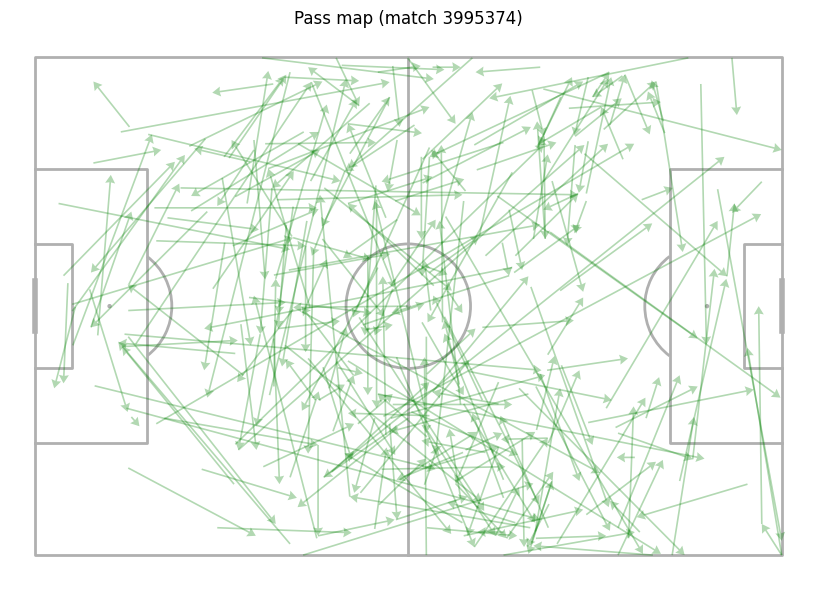

In [120]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

pitch = Pitch(pitch_type='statsbomb', pitch_length=100, pitch_width=100)
fig, ax = pitch.draw(figsize=(10,6))

sample = passes_match.sample(n=min(300, len(passes_match)))
for _, r in sample.iterrows():
    color = 'green' if r['team_name'] == team else 'red'
    alpha = 0.9 if r.get('outcome_name','') == 'Completed' else 0.3
    pitch.arrows(r['location_x'], r['location_y'], r['end_location_x'], r['end_location_y'],
                 ax=ax, width=1.2, headwidth=6, color=color, alpha=alpha)

plt.title(f'Pass map (match {match_id_filter})')
plt.show()


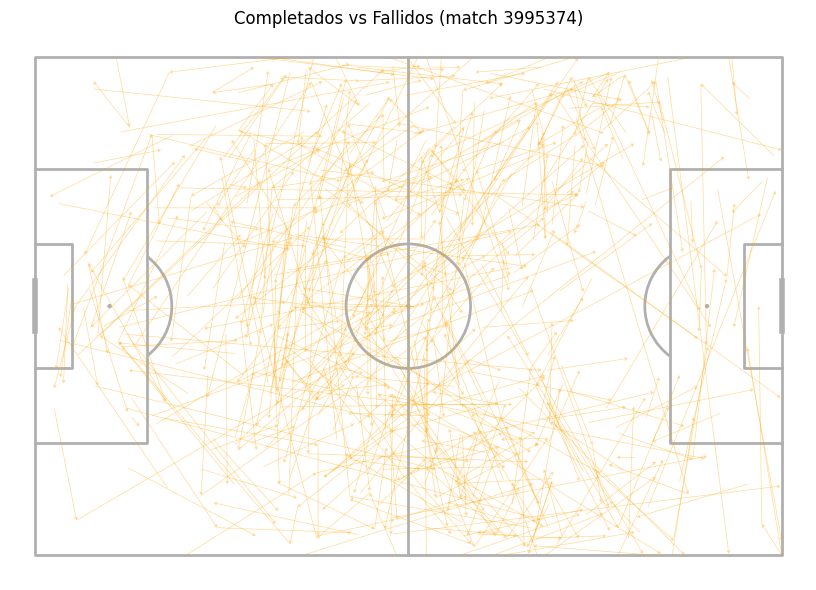

In [121]:
completed = passes_match[passes_match['outcome_name']=='Completed']
failed = passes_match[passes_match['outcome_name']!='Completed']

fig, ax = pitch.draw(figsize=(10,6))
pitch.arrows(completed['location_x'], completed['location_y'],
             completed['end_location_x'], completed['end_location_y'],
             ax=ax, width=0.5, headwidth=6, color='green', alpha=0.6)
pitch.arrows(failed['location_x'], failed['location_y'],
             failed['end_location_x'], failed['end_location_y'],
             ax=ax, width=0.5, headwidth=6, color='orange', alpha=0.4)
plt.title(f'Completados vs Fallidos (match {match_id_filter})')
plt.show()


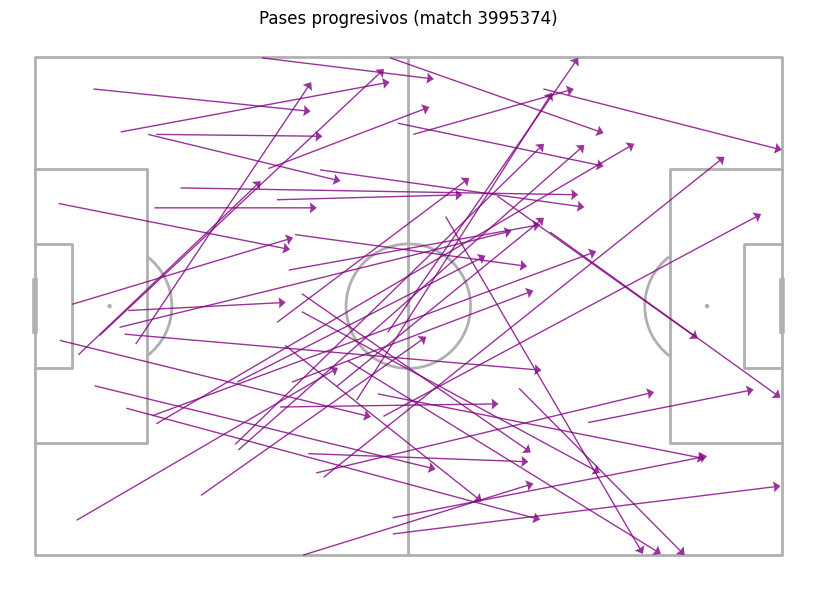

In [122]:
progressive = passes_match[(passes_match['end_location_x'] - passes_match['location_x']) > 25]
fig, ax = pitch.draw(figsize=(10,6))
pitch.arrows(progressive['location_x'], progressive['location_y'],
             progressive['end_location_x'], progressive['end_location_y'],
             ax=ax, width=1.0, headwidth=8, color='purple', alpha=0.8)
plt.title(f'Pases progresivos (match {match_id_filter})')
plt.show()


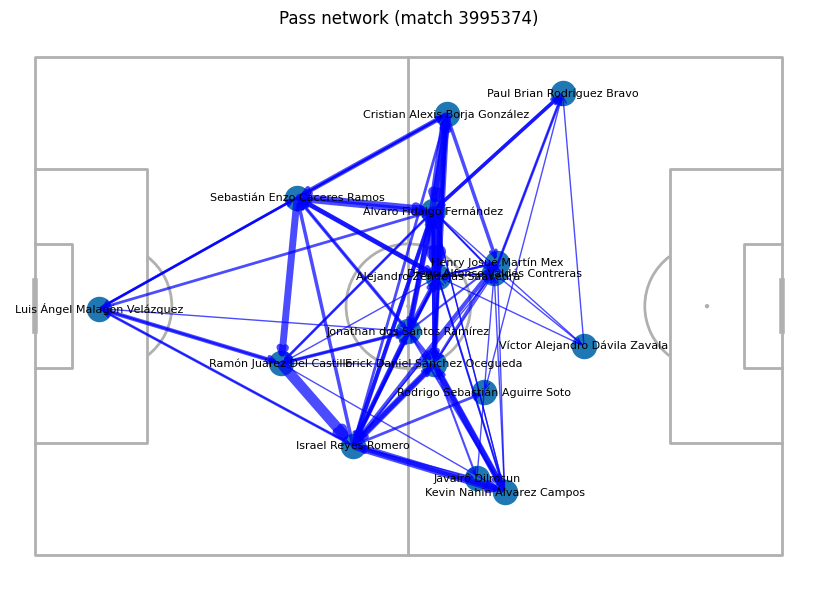

In [123]:
import networkx as nx
player_pos = passes_match.groupby('player_name')[['location_x','location_y']].mean()
edges = passes_match.groupby(['player_name','pass_recipient_name']).size().reset_index(name='n')
G = nx.DiGraph()
for _, r in edges.iterrows():
    if r['n'] >= 2:
        G.add_edge(r['player_name'], r['pass_recipient_name'], weight=r['n'])

positions = {player: (row.location_x, row.location_y) for player,row in player_pos.iterrows()}

fig, ax = pitch.draw(figsize=(10,6))
nx.draw_networkx_nodes(G, positions, node_size=300, ax=ax)
for u,v,data in G.edges(data=True):
    ux,uy = positions[u]; vx,vy = positions[v]
    ax.annotate('', xy=(vx,vy), xytext=(ux,uy),
                arrowprops=dict(arrowstyle='->', linewidth=max(1, data['weight']/2), color='blue', alpha=0.7))
nx.draw_networkx_labels(G, positions, font_size=8, ax=ax)
plt.title(f'Pass network (match {match_id_filter})')
plt.show()

## 5) Carries map (conducciones)

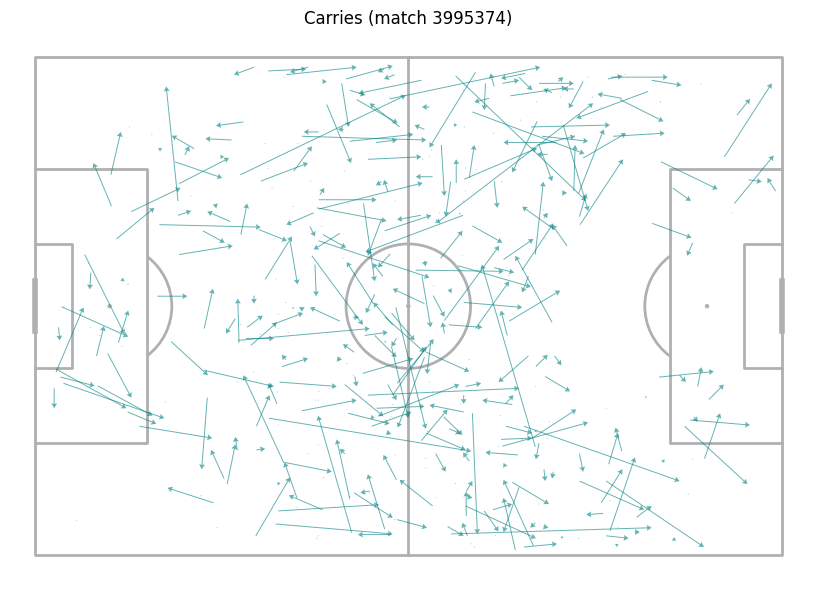

In [124]:
fig, ax = pitch.draw(figsize=(10,6))
for _, r in carries_match.iterrows():
    pitch.arrows(r['location_x'], r['location_y'],
                 r['end_location_x'], r['end_location_y'],
                 ax=ax, width=0.7, headwidth=6, color='teal', alpha=0.6)
plt.title(f'Carries (match {match_id_filter})')
plt.show()

## 6) Heatmap de recepciones (Ball Receipt)

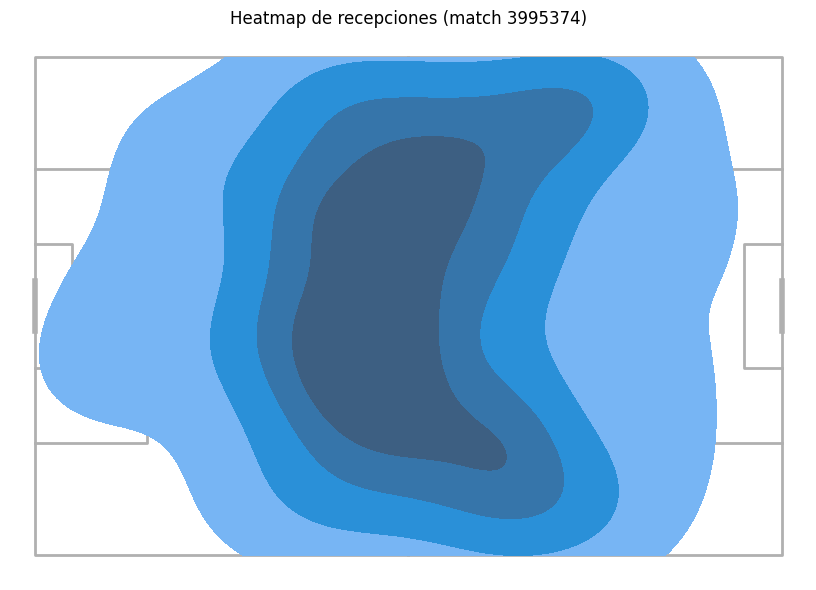

In [125]:
fig, ax = pitch.draw(figsize=(10,6))
x = receipts_match['location_x']; y = receipts_match['location_y']
# usa pitch.kdeplot o hexbin si no existe
try:
    pitch.kdeplot(x=x, y=y, ax=ax, fill=True, levels=5, shade_lowest=False)
except Exception:
    ax.hexbin(x, y, gridsize=20, cmap='Reds', alpha=0.3)
plt.title(f'Heatmap de recepciones (match {match_id_filter})')
plt.show()


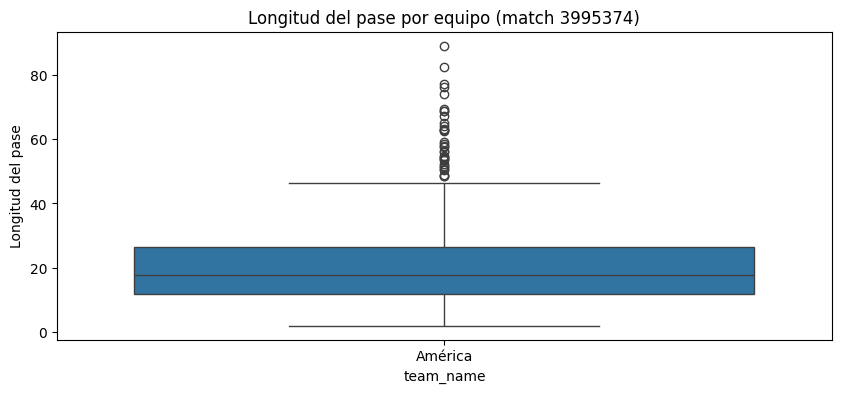

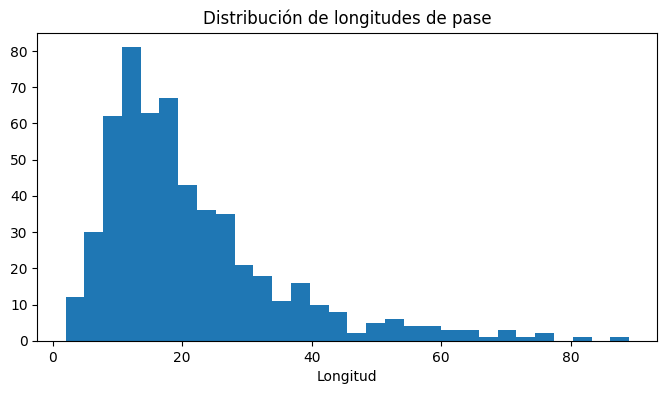

In [126]:
import seaborn as sns
passes_match = passes_match.dropna(subset=['location_x','location_y','end_location_x','end_location_y']).copy()
passes_match['pass_length'] = np.sqrt((passes_match['end_location_x']-passes_match['location_x'])**2 + (passes_match['end_location_y']-passes_match['location_y'])**2)

plt.figure(figsize=(10,4))
sns.boxplot(x='team_name', y='pass_length', data=passes_match)
plt.title(f'Longitud del pase por equipo (match {match_id_filter})')
plt.ylabel('Longitud del pase')
plt.show()

plt.figure(figsize=(8,4))
plt.hist(passes_match['pass_length'], bins=30)
plt.title('Distribución de longitudes de pase')
plt.xlabel('Longitud')
plt.show()


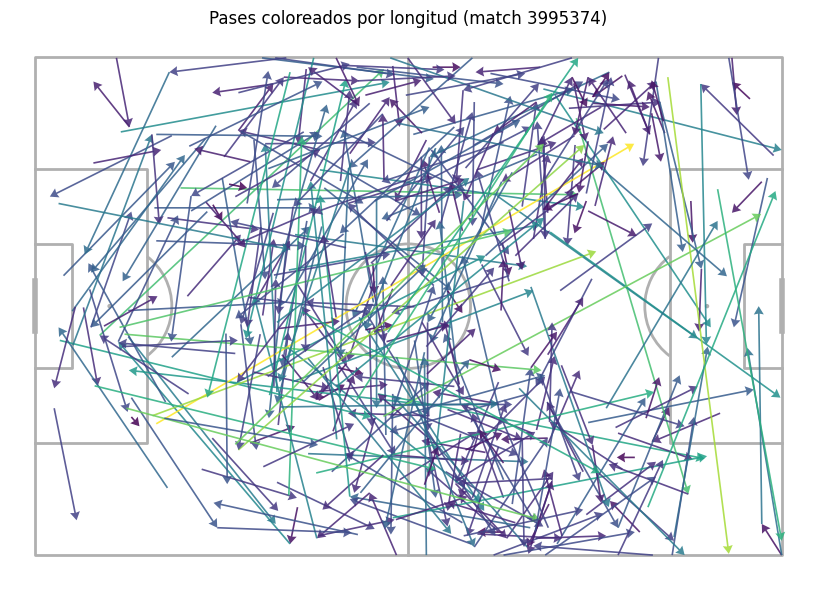

In [128]:
sample = passes_match.sample(n=min(400, len(passes_match)))
min_l = passes_match['pass_length'].min(); max_l = passes_match['pass_length'].max()
fig, ax = pitch.draw(figsize=(10,6))
for _, r in sample.iterrows():
    norm = (r['pass_length'] - min_l) / (max_l - min_l + 1e-9)
    color = plt.cm.viridis(norm)
    pitch.arrows(r['location_x'], r['location_y'], r['end_location_x'], r['end_location_y'],
                 ax=ax, width=1.2, headwidth=6, color=color, alpha=0.85)
plt.title(f'Pases coloreados por longitud (match {match_id_filter})')
plt.show()


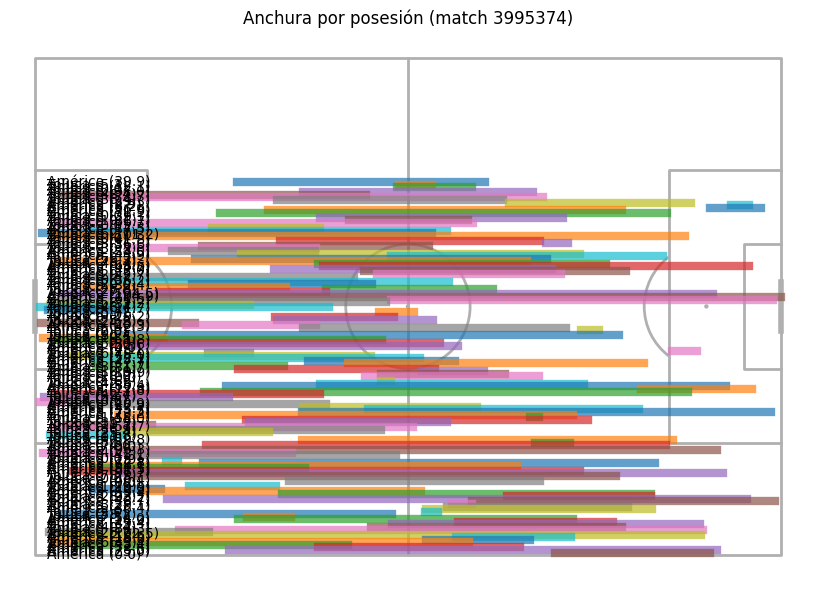

In [129]:
df_pos = events_match.dropna(subset=['location_x'])
width_per_possession = (
    df_pos.groupby(['match_id','possession','possession_team_name'])['location_x']
    .agg(['min','max']).reset_index()
)
width_per_possession['circulation_width'] = width_per_possession['max'] - width_per_possession['min']

fig, ax = pitch.draw(figsize=(10,6))
y_positions = np.linspace(20,80, len(width_per_possession))
for i, row in width_per_possession.reset_index().iterrows():
    ax.plot([row['min'], row['max']], [y_positions[i], y_positions[i]], lw=6, alpha=0.7)
    ax.text(2, y_positions[i], f"{row['possession_team_name']} ({row['circulation_width']:.1f})", va='center')
plt.title(f'Anchura por posesión (match {match_id_filter})')
plt.show()


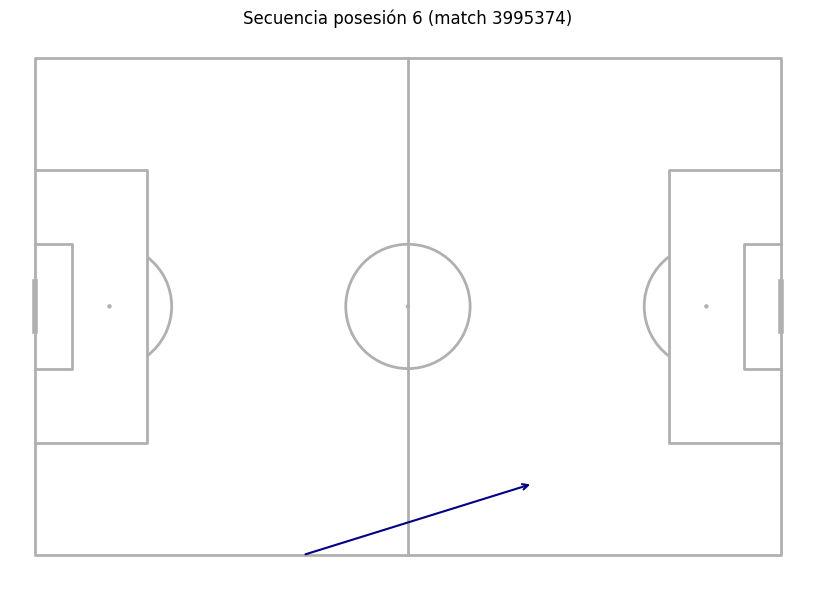

In [142]:
pos_id = width_per_possession.iloc[4]['possession']  # ejemplo: elegir una posesión
seq = events_match[events_match['possession'] == pos_id].sort_values(['minute','second'])
fig, ax = pitch.draw(figsize=(10,6))
coords = list(zip(seq['location_x'], seq['location_y']))
for i in range(len(coords)-1):
    x1,y1 = coords[i]; x2,y2 = coords[i+1]
    ax.annotate('', xy=(x2,y2), xytext=(x1,y1), arrowprops=dict(arrowstyle='->', lw=1.5, color='navy'))
plt.title(f'Secuencia posesión {pos_id} (match {match_id_filter})')
plt.show()

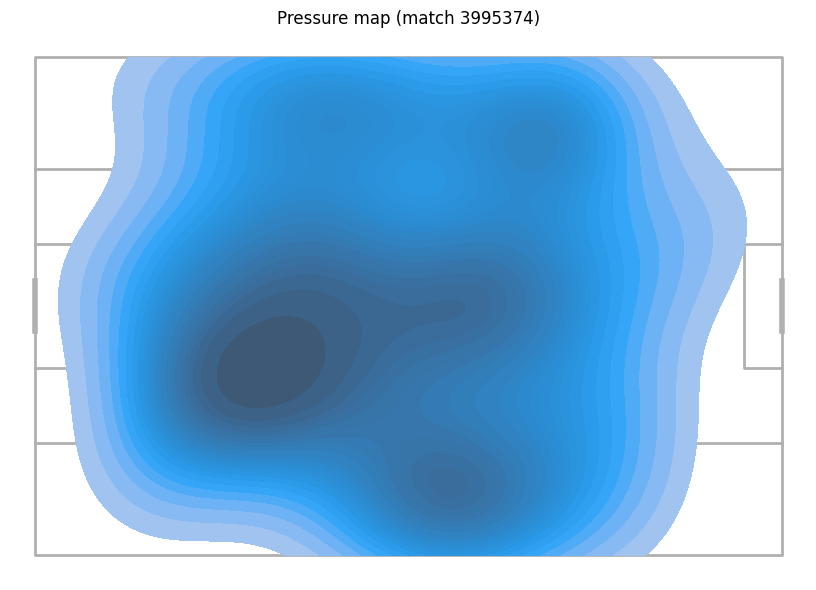

In [143]:
fig, ax = pitch.draw(figsize=(10,6))
try:
    pitch.kdeplot(pressure_match['location_x'], pressure_match['location_y'], ax=ax, fill=True, levels=25)
except Exception:
    ax.hexbin(pressure_match['location_x'], pressure_match['location_y'], gridsize=30, cmap='inferno', alpha=0.7)
plt.title(f'Pressure map (match {match_id_filter})')
plt.show()


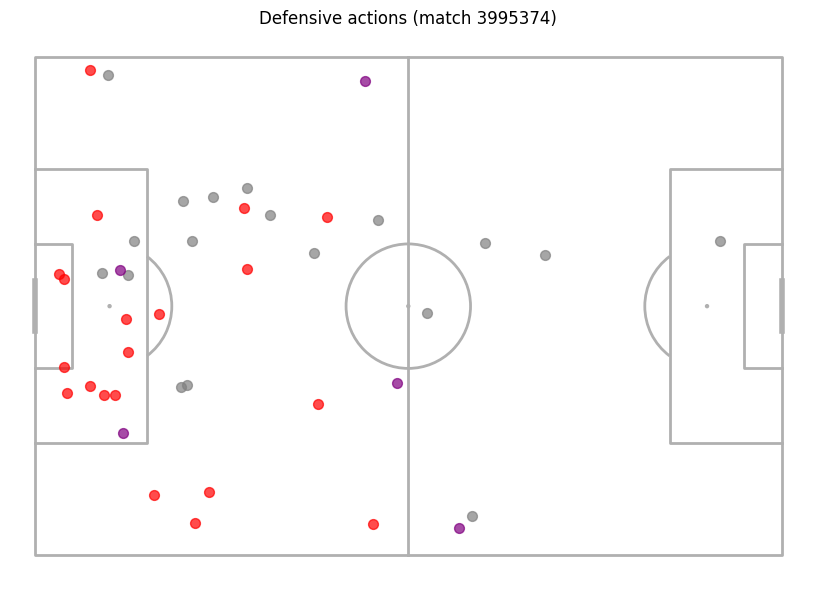

In [144]:
fig, ax = pitch.draw(figsize=(10,6))
for _, r in defs_match.iterrows():
    color = 'red' if r['event_type_name']=='Clearance' else ('purple' if r['event_type_name']=='Interception' else 'grey')
    ax.scatter(r['location_x'], r['location_y'], s=50, color=color, alpha=0.7)
plt.title(f'Defensive actions (match {match_id_filter})')
plt.show()


In [145]:
if 'xThreat' in passes_match.columns:
    fig, ax = pitch.draw(figsize=(10,6))
    for _, r in passes_match.iterrows():
        color = plt.cm.Reds(r['xThreat'] / (passes_match['xThreat'].max()+1e-9))
        pitch.arrows(r['location_x'], r['location_y'], r['end_location_x'], r['end_location_y'],
                     ax=ax, color=color, alpha=0.8, width=0.6)
    plt.title(f'Pases coloreados por xThreat (match {match_id_filter})')
    plt.show()
else:
    print("No existe columna xThreat en el dataframe.")


No existe columna xThreat en el dataframe.


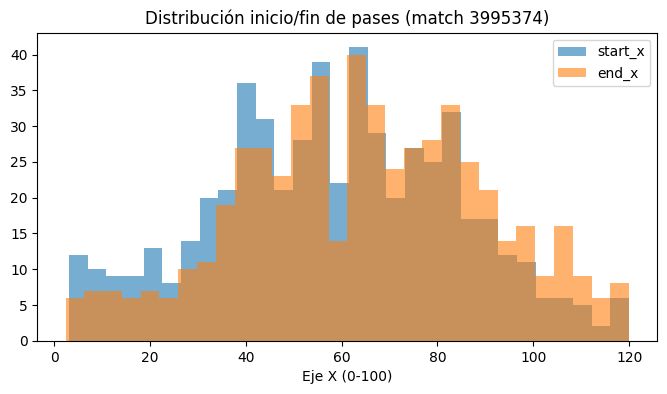

In [149]:
plt.figure(figsize=(8,4))
plt.hist(passes_match['location_x'], bins=30, alpha=0.6, label='start_x')
plt.hist(passes_match['end_location_x'], bins=30, alpha=0.6, label='end_x')
plt.xlabel('Eje X (0-100)')
plt.legend()
plt.title(f'Distribución inicio/fin de pases (match {match_id_filter})')
plt.show()


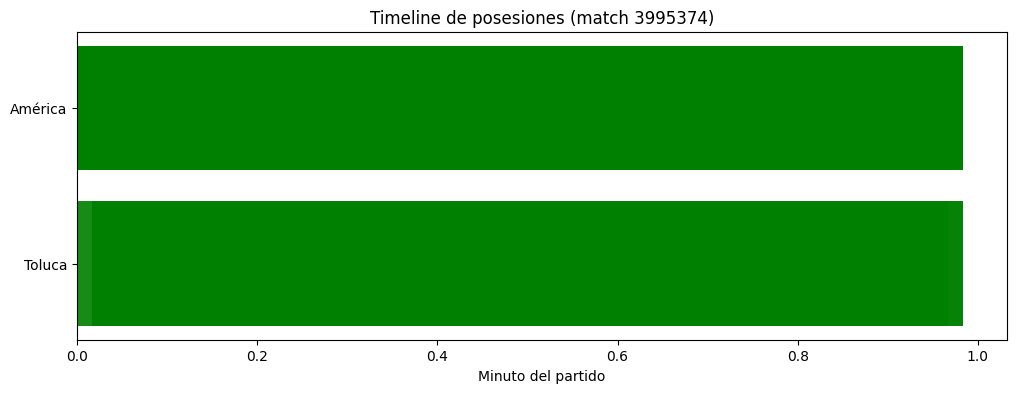

In [153]:
# requiere possession_times con start_time, end_time y duration (en segundos)
possession_times = (
    events_match.groupby(['possession','possession_team_name'])['second']
    .agg(['min','max']).reset_index()
)
possession_times['start_time'] = possession_times['min']; possession_times['duration'] = possession_times['max'] - possession_times['min']
possession_times_sorted = possession_times.sort_values('start_time')

fig, ax = plt.subplots(figsize=(12,4))
teams = possession_times_sorted['possession_team_name'].unique()
y_map = {t:i for i,t in enumerate(teams)}
for _, r in possession_times_sorted.iterrows():
    team = r['possession_team_name']; start = r['start_time']/60; dur = r['duration']/60
    ax.barh(y_map[team], dur, left=start, color='green' if team==team else 'orange', alpha=0.7)
ax.set_yticks(list(y_map.values())); ax.set_yticklabels(list(y_map.keys()))
ax.set_xlabel('Minuto del partido')
plt.title(f'Timeline de posesiones (match {match_id_filter})')
plt.show()


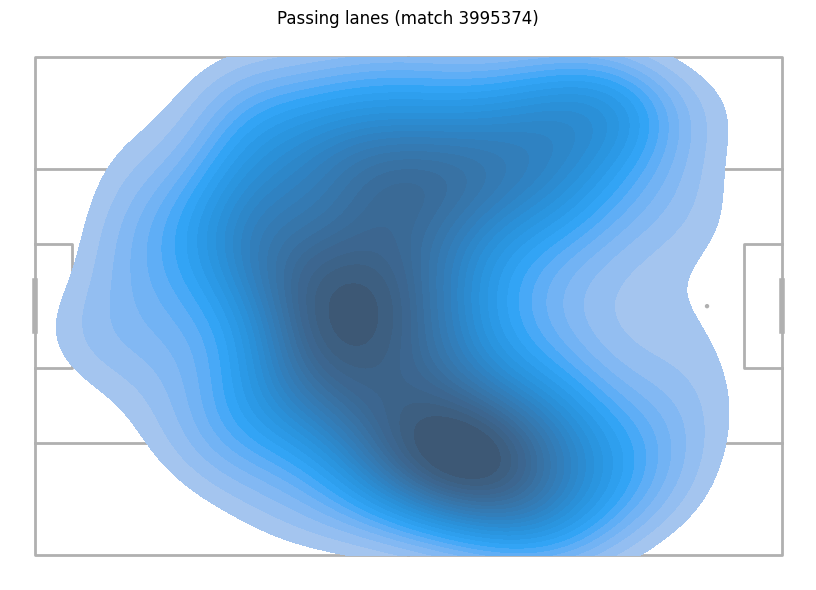

In [154]:
mid_x = (passes_match['location_x'] + passes_match['end_location_x'])/2
mid_y = (passes_match['location_y'] + passes_match['end_location_y'])/2
fig, ax = pitch.draw(figsize=(10,6))
try:
    pitch.kdeplot(mid_x, mid_y, ax=ax, fill=True, levels=25)
except Exception:
    ax.hexbin(mid_x, mid_y, gridsize=30, cmap='Blues', alpha=0.7)
plt.title(f'Passing lanes (match {match_id_filter})')
plt.show()


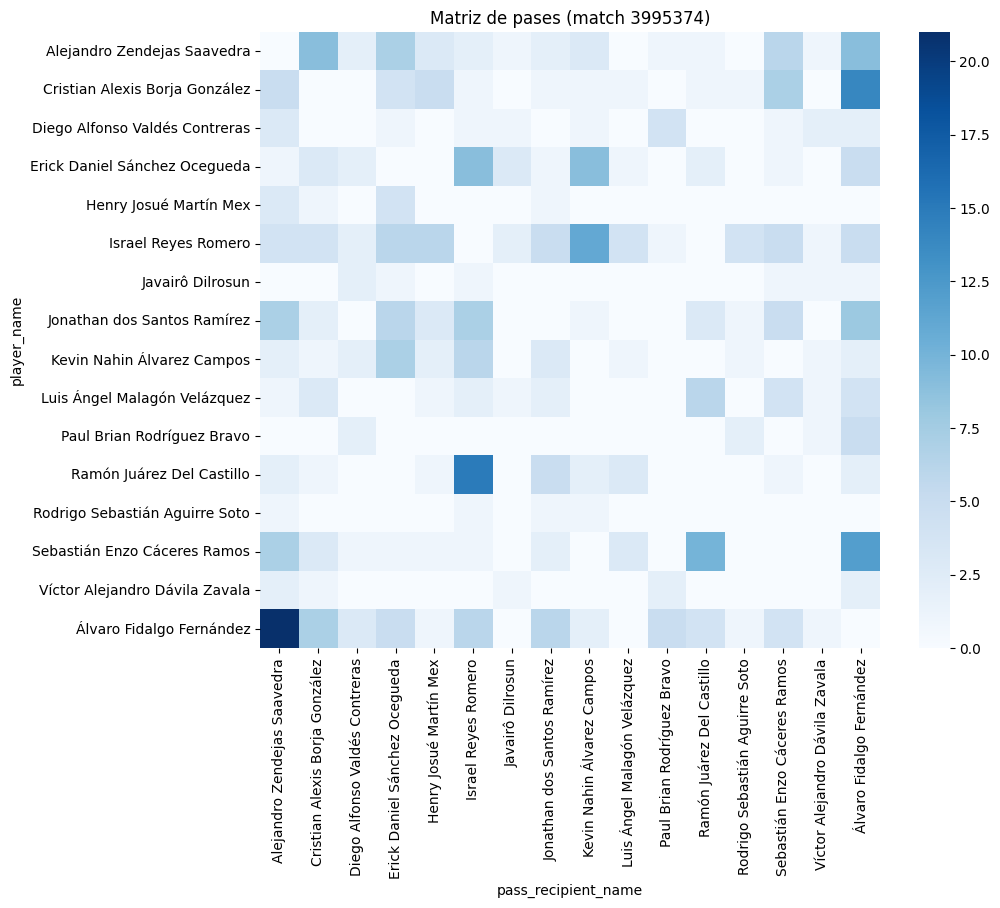

In [156]:
import seaborn as sns
mat = passes_match.groupby(['player_name','pass_recipient_name']).size().unstack(fill_value=0)
plt.figure(figsize=(10,8)); sns.heatmap(mat, cmap='Blues')
plt.title(f'Matriz de pases (match {match_id_filter})')
plt.show()


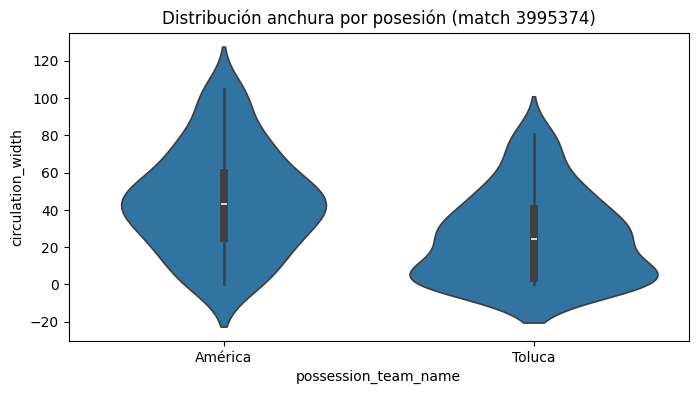

In [157]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.violinplot(x='possession_team_name', y='circulation_width', data=width_per_possession)
plt.title(f'Distribución anchura por posesión (match {match_id_filter})')
plt.show()


In [159]:
def tercio(x):
    if x < 33.33: return 'def'
    if x < 66.66: return 'mid'
    return 'att'
passes_match['start_tercio'] = passes_match['location_x'].apply(tercio)
tercio_stats = passes_match.groupby(['team_name','start_tercio'])['pass_length'].mean().unstack()
tercio_stats


start_tercio,att,def,mid
team_name,,,
América,17.806259,27.757668,22.05727


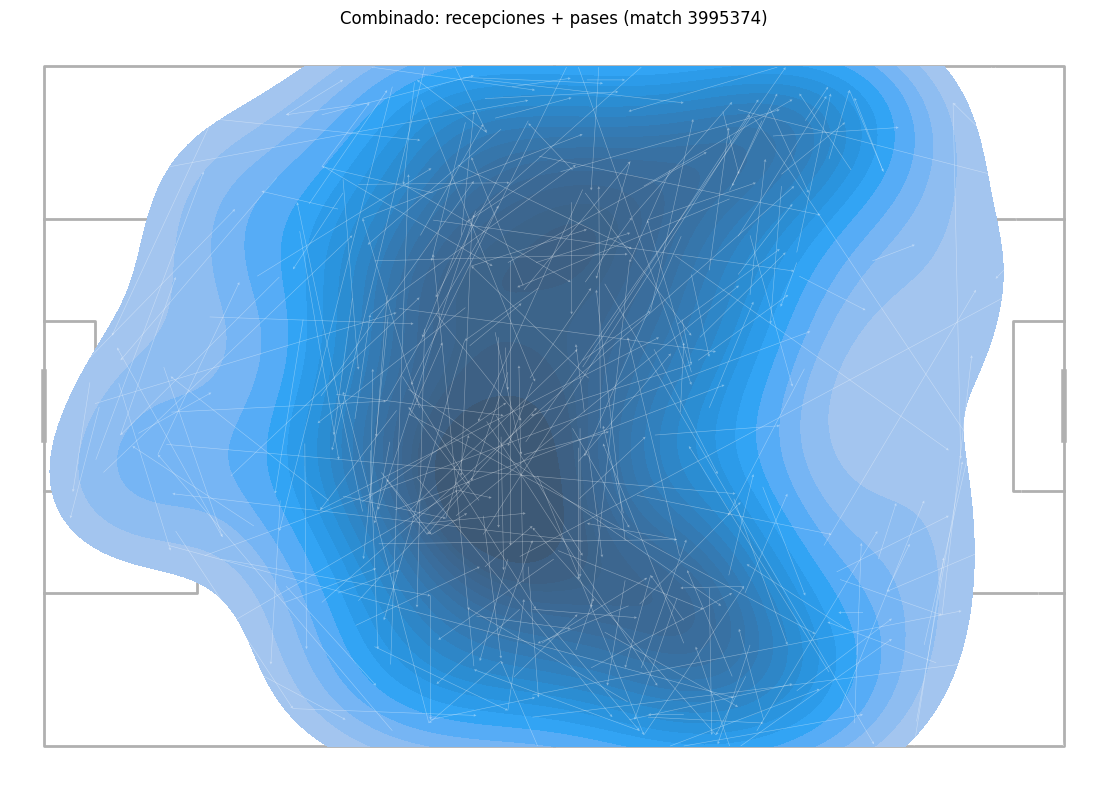

In [160]:
fig, ax = pitch.draw(figsize=(12,8))
# heatmap de recepciones
try:
    pitch.kdeplot(receipts_match['location_x'], receipts_match['location_y'], ax=ax, fill=True, levels=20, shade_lowest=False)
except Exception:
    ax.hexbin(receipts_match['location_x'], receipts_match['location_y'], gridsize=30, cmap='Reds', alpha=0.5)

# flechas de pases (transparencia)
sample = passes_match.sample(n=min(300, len(passes_match)))
for _, r in sample.iterrows():
    pitch.arrows(r['location_x'], r['location_y'], r['end_location_x'], r['end_location_y'],
                 ax=ax, width=0.4, headwidth=5, color='white', alpha=0.4)

# dibujar labels o red si lo deseas (usar pass network snippet)
plt.title(f'Combinado: recepciones + pases (match {match_id_filter})')
plt.show()
